In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [20]:
prcp_file = '/Users/pjh/data/nclimgrid-dev/monthly/nclimgrid_prcp.nc'

with xr.open_dataset(prcp_file) as ncfile:
    xrd = ncfile

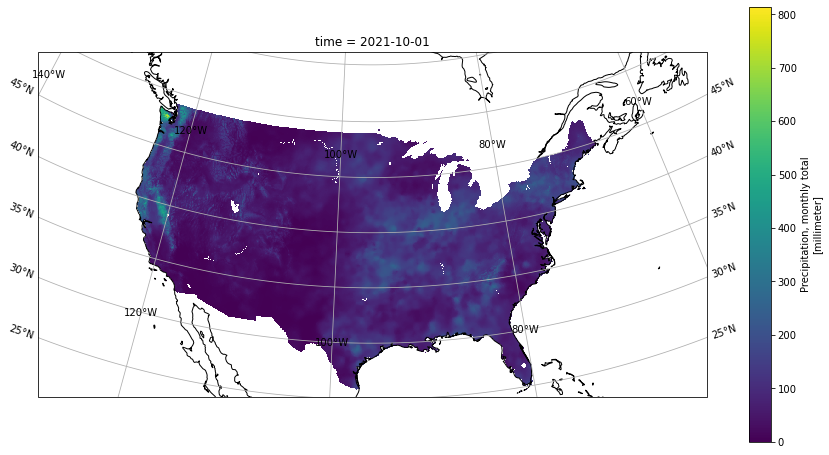

In [21]:
t = np.datetime64('2021-10', 'ns')
buf = 3

central_lon = (xrd.attrs['geospatial_lon_min']+ xrd.attrs['geospatial_lon_max']) / 2
central_lat = (xrd.attrs['geospatial_lat_min'] + xrd.attrs['geospatial_lat_max']) / 2
extent = [xrd.attrs['geospatial_lon_min'] - buf,
          xrd.attrs['geospatial_lon_max'] + buf,
          xrd.attrs['geospatial_lat_min'] - buf,
          xrd.attrs['geospatial_lat_max'] + buf]

plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon,
                                               central_latitude=central_lat))
ax.set_extent(extent)
prcp = xrd.prcp.sel(time=t).plot.imshow(ax=ax, transform=ccrs.PlateCarree())
# prcp.set_clim(0, 700)
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.savefig('img/prcp_monthly_2021-10.jpg')
plt.show()



## monthly tavg

In [22]:
tavg_file = '/Users/pjh/data/nclimgrid-dev/monthly/nclimgrid_tavg.nc'

with xr.open_dataset(tavg_file) as ncfile:
    xrd = ncfile